# Predicción de gastos médicos de pacientes utilizando la Regresión Lineal Múltiple
___

Para este proyecto, vamos a crear un modelo para predecir el cargo medico que gastara un paciente segun sus caracteristicas

## Cargando las librerias

In [66]:
import pandas as pd
import seaborn as sns

In [67]:
# Estilo de las graficas
sns.set(style='whitegrid', context='notebook')

## Cargando los datos

In [68]:
df = pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
# dimensiones del dataframe
df.shape

(1338, 7)

## Analisis de los datos

Analicemos la distribucion de la variable objetivo, que en este caso es *charges*

<AxesSubplot:>

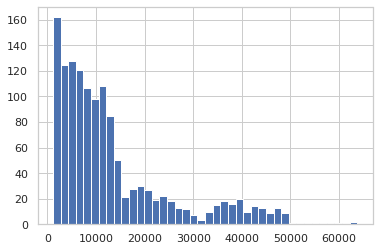

In [70]:
# histograma de la variable objetivo
df.charges.hist(bins=40)

El grafico muestra que existen outliers en valores por arriba de 50.000.Veamos cuantos outliers son:

In [71]:
df[df.charges > 50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


Vemos que son solo 6 registros. Debido a que son tan poco en comparacion con el total (1338), los eliminamos

In [72]:
df = df[df.charges < 50000]
df.shape

(1331, 7)

## Correlaciones

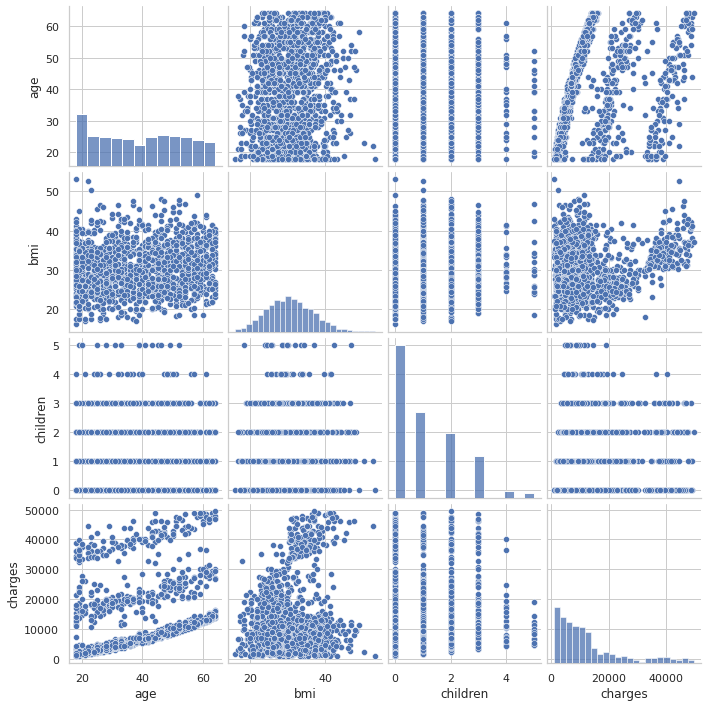

In [73]:
# creamos una matriz de graficos
sns.pairplot(df, height=2.5);

Puntos interesantes a ver:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

- En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

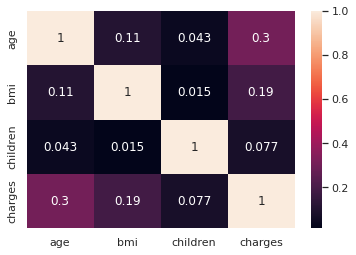

In [74]:
# mapa de calor entre variables numericas
import numpy as np

# agrupamos variables numericas
numeric_cols = ['age','bmi','children','charges']

# obtenemos los coeficientes de correlacion de las variables
cm = np.corrcoef(df[numeric_cols].values.T)

# Plot heat map
sns.heatmap(cm, annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols);

## Convertir variables categoricas a numericas

In [75]:
# pasamos las variables categoricas
pd.get_dummies(df, columns=['sex','smoker','region'])

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [76]:
# papa eliminar las variables redundantes utilizamos el parametro drop_first
df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Primer modelo

In [77]:
# seleccion de variables predictoras
X_cols = list(set(df.columns) - set(['charges']))
X=df[X_cols]

# seleccion variable objetivo
y_col = ['charges']
y = df[y_col]

In [78]:
# dividimos los datos en dos grupos: entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [79]:
# trabajamos con la libreria statsmodel
import statsmodels.api as sm

# Agrega una columna de unos a la matriz X_train para calcular el intercepto en el modelo 
X_constant = sm.add_constant(X_train)

# Crea un modelo de regresion lineal ordinaria (OLS) pasandole la variable objetivo y la matriz de 
# caracteristicas aumentada y luego se ajusta el modelo mediante fit()
lin_reg = sm.OLS(y_train, X_constant).fit()

# Crea un resumen detallado del modelo
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     380.8
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          9.09e-296
Time:                        13:28:26   Log-Likelihood:                -10058.
No. Observations:                 998   AIC:                         2.013e+04
Df Residuals:                     989   BIC:                         2.018e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.118e+04   1093.655    -10.225      0.000   -1.33e+04   -9036.242
smoker_yes        2.353e+04    463.107     50.815      0.000    2.26e+04    2.44e+04
age                254.2738     13.281     19.146      0.000     228.212     280.335
bmi                311.6662     31.210      9.986      0.000     250.420     372.912
children           467.4211    154.654      3.022      0.003     163.934     770.908
sex_male          -203.0528    368.059     -0.552      0.581    -925.319     519.214
region_northwest   106.9357    527.366      0.203      0.839    -927.948    1141.820
region_southwest -1069.0065    519.341     -2.058      0.040   -2088.143     -49.870
region_southeast  -832.9016    535.835     -1.554      0.120   -1884.405     218.602
==============================================================================
Omnibus:                      201.145   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.895
Skew:                           1.136   Prob(JB):                     4.02e-92
Kurtosis:                       5.227   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Evaluacion supuestos

Para evaluar los supuestos de la regresion lineal en los modelos, vamos a llamar las funciones guardadas en el notebook *Funciones_Supuestos.ipynb* 

In [80]:
%run Funciones_Supuestos.ipynb

**Media de los residuales**

In [81]:
Med_residual(lin_reg)

4.3904763147284377e-10


**Normalidad**

ShapiroResult(statistic=0.8992074728012085, pvalue=4.471625500732965e-25)


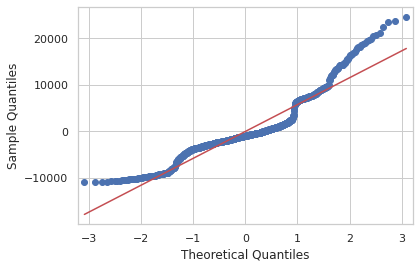

In [82]:
Norm_residuales(lin_reg)

No cumple con el supuesto de normalidad

**Linealidad**

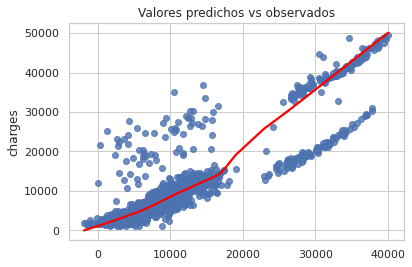

In [83]:
Linealidad(y_train, lin_reg)

No cumple con el supuesto de linealidad

**Homocedasticidad**


Breush - Pagan Test: p-value= 2.9971996127205647e-15


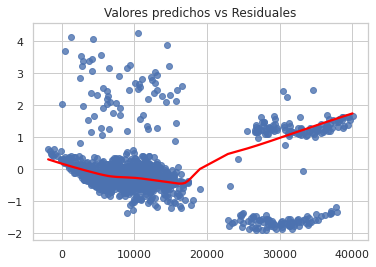

In [84]:
Homocedasticidad(lin_reg)

No cumple con la homocedasticidad

**Multicolinealidad**

In [85]:
Multicolinealidad(X_train)

,smoker_yes,age,bmi,children,sex_male,region_northwest,region_southwest,region_southeast
vif,1.01668,1.015852,1.100094,1.006579,1.009,1.514154,1.537172,1.640511


Las variables son independientes entre si. Cumple con el supuesto de multicolinealidad

## Transformacion de las variables predictoras
Vamos a crear nuevas variables predictoras a partir de las existentes. Debemos tener algun criterio o argumento valido que relaciones las variables que vamos a unificar

In [86]:
# copia del dataframe
df_second = df.copy()

In [87]:
# Nueva variable: edad elevada al cuadrado
df_second['age2'] = df_second.age**2

# Nueva variable: sobrepeso
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int)

# Nueva variable: sobrepeso y condicion de fumador
df_second['sobrepeso_fumador'] = df_second.sobrepeso*df_second.smoker_yes

df_second

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age2,sobrepeso,sobrepeso_fumador
0,19,27.900,0,16884.92400,0,1,0,0,1,361,0,0
1,18,33.770,1,1725.55230,1,0,0,1,0,324,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,784,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0,1089,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,1024,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0,2500,1,0
1334,18,31.920,0,2205.98080,0,0,0,0,0,324,1,0
1335,18,36.850,0,1629.83350,0,0,0,1,0,324,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1,441,0,0


## Segundo Modelo

In [88]:
# definir variables predictoras
X_2 = list(set(df_second.columns) - set(['charges']))
X_2 = df_second[X_2]

# definir variable objetivo
y_2 = ['charges']
y_2 = df_second[y_2]

In [89]:
# dividimos los datos en dos grupos: entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2)

In [90]:
# entrenar el modelo
X_constant = sm.add_constant(X_train_2)
lin_reg_2 = sm.OLS(y_train_2, X_constant).fit()
lin_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     566.6
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:28:27   Log-Likelihood:                -9757.5
No. Observations:                 998   AIC:                         1.954e+04
Df Residuals:                     986   BIC:                         1.960e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               901.7296   1517.162      0.594      0.552   -2075.507    3878.966
smoker_yes         1.331e+04    499.223     26.664      0.000    1.23e+04    1.43e+04
age                 -51.0486     67.307     -0.758      0.448    -183.130      81.033
bmi                  92.5133     38.157      2.425      0.016      17.636     167.391
sobrepeso          -946.8776    466.687     -2.029      0.043   -1862.691     -31.065
children            769.0175    122.593      6.273      0.000     528.445    1009.590
sex_male           -464.7884    273.189     -1.701      0.089   -1000.888      71.311
region_northwest     -0.9986    392.443     -0.003      0.998    -771.117     769.120
region_southwest   -971.7508    388.411     -2.502      0.013   -1733.958    -209.544
age2                  3.9845      0.840      4.745      0.000       2.337       5.632
region_southeast   -489.9262    393.774     -1.244      0.214   -1262.658     282.806
sobrepeso_fumador  1.923e+04    690.126     27.872      0.000    1.79e+04    2.06e+04
==============================================================================
Omnibus:                      679.846   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6158.327
Skew:                           3.200   Prob(JB):                         0.00
Kurtosis:                      13.351   Cond. No.                     2.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Evaluacion supuestos modelo 2

**Media de los residuales**

In [91]:
Med_residual(lin_reg_2)

-4.9734687977862395e-09


- Cumple con el supuesto de la media de los residuales

**Normalidad**

ShapiroResult(statistic=0.4821518063545227, pvalue=0.0)


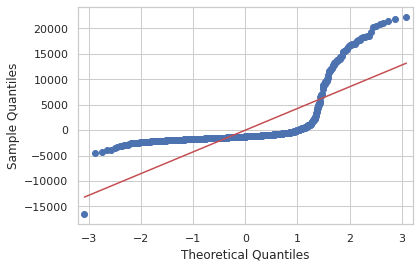

In [92]:
Norm_residuales(lin_reg_2)

- no cumple con el supuesto de normalidad

**Homocedasticidad**


Breush - Pagan Test: p-value= 0.7405371974502342


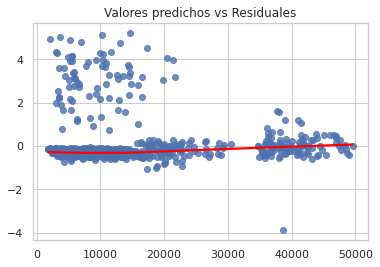

In [93]:
Homocedasticidad(lin_reg_2)

- Cumple con el supuesto de homocedasticidad

**Linealidad**

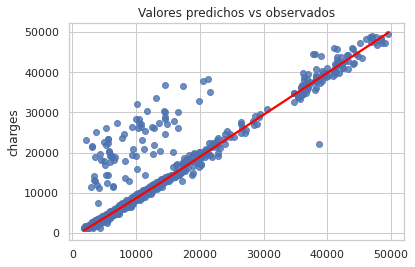

In [94]:
Linealidad(y_train_2, lin_reg_2)

- Cumple con el supuesto de linealidad

**Multicolinealidad**

In [95]:
Multicolinealidad(X_train_2)

,smoker_yes,age,bmi,sobrepeso,children,sex_male,region_northwest,region_southwest,age2,region_southeast,sobrepeso_fumador
vif,2.116034,49.391602,2.91394,2.945246,1.130605,1.011443,1.512032,1.547873,49.414326,1.643474,2.369411


- Tanto age como age2 estan altamente correlacionados. No cumple con el supuesto de multicolinealidad.

En conclusion, el modelo 2 cumple con los supuestos mas importantes. Sin embargo, podria menjorarse.

## Eliminacion de variables
Del modelo 2, vemos que hay un conjunto de variables que no son significativas (p-value > 0.05): region_northwest, sex_male, age, bmi, region_southeast, region_southwest y sobrepeso. Vamos a omitir estas variables y entrenar un nuevo modelo

In [113]:
# variables predictoras
X_3 = ['sobrepeso_fumador','smoker_yes','age2','children']
X_train_3 = X_train_2[X_3]

# variable objetivo
y_train_3 = y_train_2['charges']

# datos de prueba
X_test_3 = X_test_2[X_3]
y_test_3 = y_test_2

## Tercer Modelo

In [109]:
# entrenar el modelo
X_constant = sm.add_constant(X_train_3)
lin_reg_3 = sm.OLS(y_train_3, X_constant).fit()
lin_reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1540.
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:31:10   Log-Likelihood:                -9765.6
No. Observations:                 998   AIC:                         1.954e+04
Df Residuals:                     993   BIC:                         1.957e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1755.2317    287.955      6.096      0.000    1190.162    2320.302
sobrepeso_fumador  1.904e+04    619.866     30.716      0.000    1.78e+04    2.03e+04
smoker_yes         1.338e+04    475.360     28.153      0.000    1.24e+04    1.43e+04
age2                  3.3663      0.120     27.983      0.000       3.130       3.602
children            714.7409    115.881      6.168      0.000     487.341     942.141
==============================================================================
Omnibus:                      668.813   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5930.525
Skew:                           3.137   Prob(JB):                         0.00
Kurtosis:                      13.161   Cond. No.                     1.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vemos que todas las variables, para este modelo, son significativas

## Evaluacion supuestos Modelo 3

**Media de los residuales**

In [98]:
Med_residual(lin_reg_3)

-1.4835627009874528e-08


- Cumple con el supuesto de la media de los residuales

**Normalidad**

ShapiroResult(statistic=0.4789671301841736, pvalue=0.0)


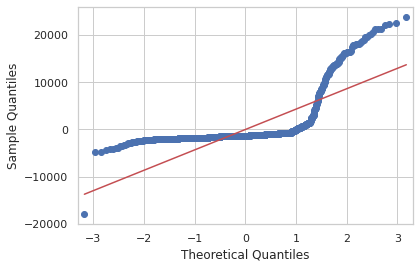

In [99]:
Norm_residuales(lin_reg_3)

- No cumple con el supuesto de normalidad

**Homocedasticidad**


Breush - Pagan Test: p-value= 0.12518588958567367


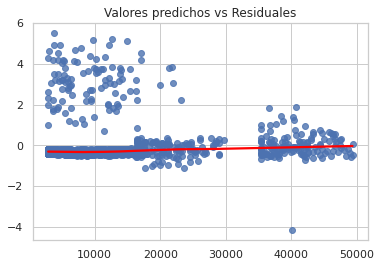

In [100]:
Homocedasticidad(lin_reg_3)

- Cumple con el supuesto de homocedasticidad

**Linealidad**

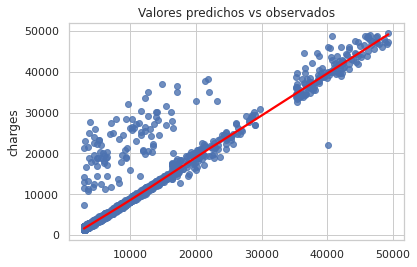

In [101]:
Linealidad(y_train_3, lin_reg_3)

- Cumple con la linealidad

**Multicolinealidad**

In [102]:
Multicolinealidad(X_train_3)

,sobrepeso_fumador,smoker_yes,age2,children
vif,1.856049,1.857758,1.001314,1.000137


- Cumple con el supuesto de multicolinealidad

En conclusion, el modelo 3, cumple con los supuestos mas importantes de la regresion lineal. Es el modelo mas confiable de todos.

## Analisis de cada modelo frente a nuevos datos

In [103]:
from sklearn.metrics import mean_squared_error, r2_score

# modelo 1

# prediccion del modelo 1 con datos de prueba
Xnew = sm.add_constant(X_test)
pred_test = lin_reg.predict(Xnew)

# metricas
r_test = r2_score(y_test, pred_test)
MSE_test = mean_squared_error(y_test, pred_test)

print(f'Modelo 1: (R^2 = {r_test}), (MSE = {MSE_test})')

Modelo 1: (R^2 = 0.7446129900792225), (MSE = 35976225.903929435)


In [111]:
# modelo 2

# prediccion del modelo 2 con datos de prueba
Xnew = sm.add_constant(X_test_2)
pred_test_2 = lin_reg_2.predict(Xnew)

# metricas
r_test = r2_score(y_test_2, pred_test_2)
MSE_test = mean_squared_error(y_test_2, pred_test_2)

print(f'Modelo 2: (R^2 = {r_test}), (MSE = {MSE_test})')

Modelo 2: (R^2 = 0.8732535943442137), (MSE = 18650872.425632775)


In [114]:
# modelo 3

# prediccion del modelo 3 con datos de prueba
Xnew = sm.add_constant(X_test_3)
pred_test_3 = lin_reg_3.predict(Xnew)

# metricas
r_test = r2_score(y_test_3, pred_test_3)
MSE_test = mean_squared_error(y_test_3, pred_test_3)

print(f'Modelo 3: (R^2 = {r_test}), (MSE = {MSE_test})')

Modelo 3: (R^2 = 0.8697552835563712), (MSE = 19165652.689985666)


A pesar que el modelo 2 responde ligeremente mejor que el modelo 3 frente a nuevos datos, el modelo 3 es el mejor ya que cumple con los supuestos de la regresion lineal.